In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('AB_NYC_2019.csv')

print(df.head())
print()

print("Shape of dataset:", df.shape)
print()



     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  20

In [4]:

print("Column names:", df.columns)
print()

print("Data types of columns:", df.dtypes)
print()

print("Info about dataset:")
print(df.info())
print()


print("Missing values in each column:")
print(df.isnull().sum())
print()

print("Number of duplicate rows:", df.duplicated().sum())
print()


Column names: Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

Data types of columns: id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365    


Mean values:
 price                             152.720687
minimum_nights                      7.029962
number_of_reviews                  23.274466
reviews_per_month                   1.090910
calculated_host_listings_count      7.143982
availability_365                  112.781327
dtype: float64

Median values:
 price                             106.00
minimum_nights                      3.00
number_of_reviews                   5.00
reviews_per_month                   0.37
calculated_host_listings_count      1.00
availability_365                   45.00
dtype: float64

Mode values:
 price                             100.0
minimum_nights                      1.0
number_of_reviews                   0.0
reviews_per_month                   0.0
calculated_host_listings_count      1.0
availability_365                    0.0
Name: 0, dtype: float64


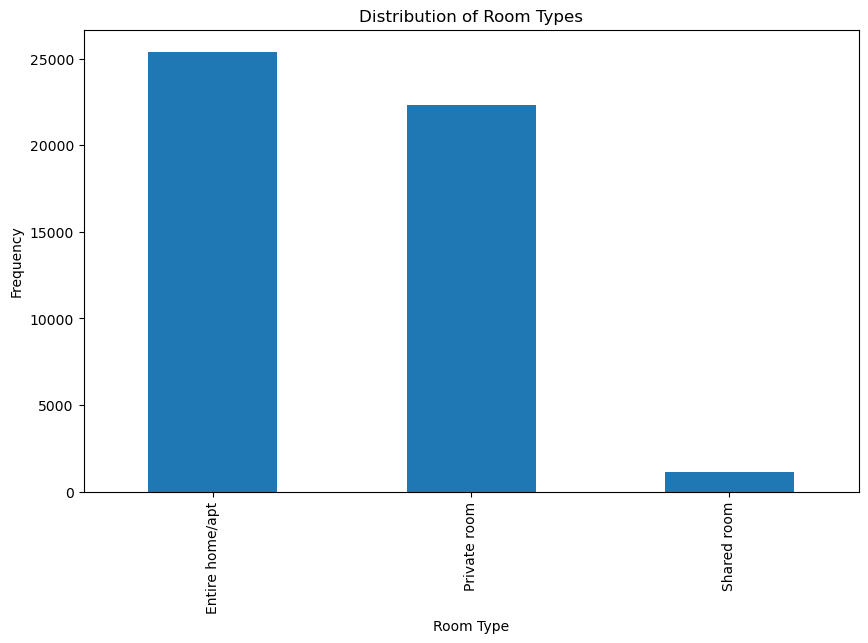

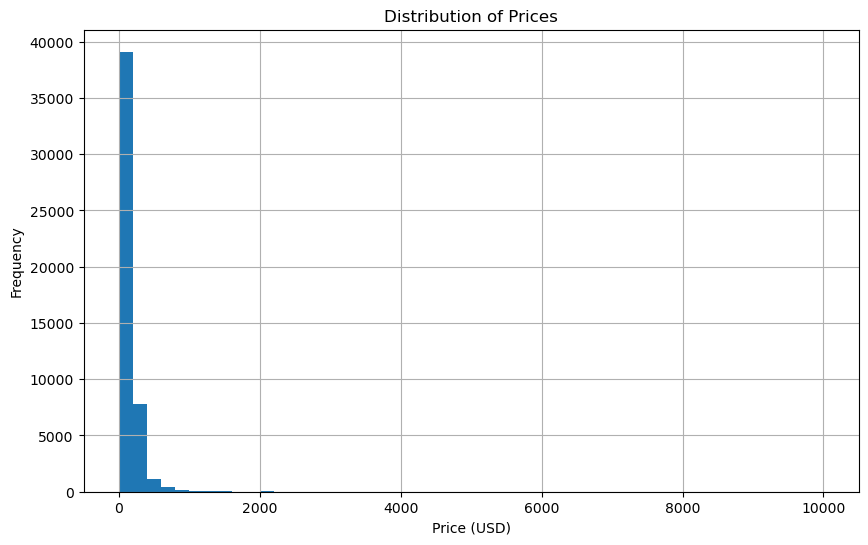

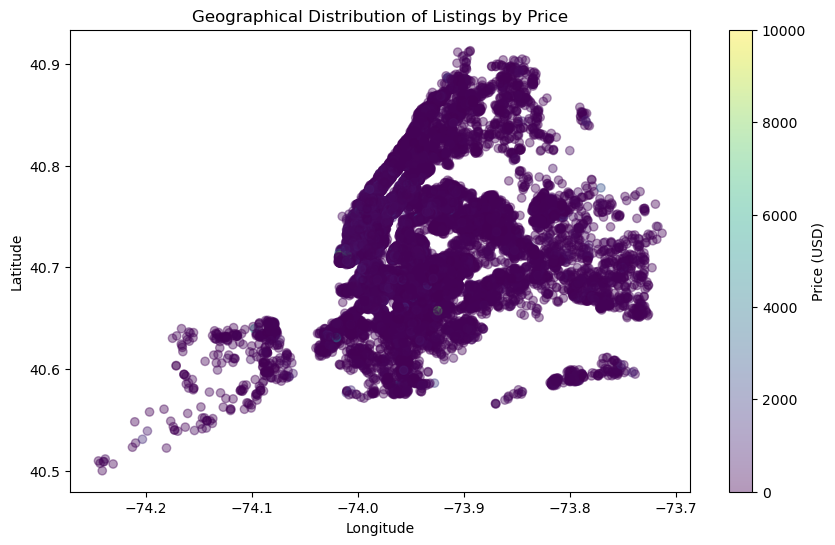

In [9]:

df.drop_duplicates(inplace=True)

df['reviews_per_month'] = df['reviews_per_month'].fillna(0)
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

df['last_review'] = pd.to_datetime(df['last_review'])

numerical_columns = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

mean_values = df[numerical_columns].mean()
print("\nMean values:\n", mean_values)

median_values = df[numerical_columns].median()
print("\nMedian values:\n", median_values)

mode_values = df[numerical_columns].mode().loc[0]
print("\nMode values:\n", mode_values)


plt.figure(figsize=(10, 6))
df['room_type'].value_counts().plot(kind='bar')
plt.xlabel('Room Type')
plt.ylabel('Frequency')
plt.title('Distribution of Room Types')
plt.show()

plt.figure(figsize=(10, 6))
df['price'].hist(bins=50)
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.title('Distribution of Prices')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df['longitude'], df['latitude'], alpha=0.4, c=df['price'], cmap='viridis')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Distribution of Listings by Price')
plt.colorbar(label='Price (USD)')
plt.show()



In [15]:
grouped_data = df.groupby(['neighbourhood_group', 'neighbourhood']).agg({
    'id': 'count',
    'price': 'mean'
}).rename(columns={'id': 'number_of_listings', 'price': 'average_price'})
print("Grouped data by neighbourhood_group and neighbourhood:")
print(grouped_data.head(100))

host_summary = df.groupby('host_id').agg({
    'id': 'count',
    'price': 'mean'
}).rename(columns={'id': 'number_of_listings', 'price': 'average_price'})
print("Host summary sorted by number of listings:")
print(host_summary.sort_values(by='number_of_listings', ascending=False).head())

X = df[['availability_365', 'minimum_nights', 'number_of_reviews', 'reviews_per_month']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

df.to_csv('AB_NYC_2019_cleaned.csv', index=False)

Grouped data by neighbourhood_group and neighbourhood:
                                       number_of_listings  average_price
neighbourhood_group neighbourhood                                       
Bronx               Allerton                           42      87.595238
                    Baychester                          7      75.428571
                    Belmont                            24      77.125000
                    Bronxdale                          19      57.105263
                    Castle Hill                         9      63.000000
...                                                   ...            ...
Manhattan           Battery Park City                  70     367.557143
                    Chelsea                          1113     249.738544
                    Chinatown                         368     161.497283
                    Civic Center                       52     191.942308
                    East Harlem                      1117     133.198

In [17]:
rows, columns = df.shape

print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")

Number of rows: 48895
Number of columns: 16
